In [69]:
from __future__ import division
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib as matplot
from math import ceil,floor
import seaborn as sns

In [70]:
%matplotlib inline

In [71]:
df=pd.read_csv(r'C:\Users\ranbir\OneDrive - University of Stirling\IceRobotics\Data\20_07\20_07_3_day_window.csv',header='infer',parse_dates=True,infer_datetime_format=True)

In [72]:
df.dtypes

subject                 object
start                   object
mi                     float64
steps                  float64
Standing time          float64
lying time               int64
standing change        float64
actual calving date     object
calving time            object
stand state            float64
lying bouts            float64
dtype: object

In [73]:
df.head()

,subject,start,mi,steps,Standing time,lying time,standing change,actual calving date,calving time,stand state,lying bouts
0,2609BL,06/06/2016 00:00,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0,0.0
1,2609BL,06/06/2016 00:15,10.0,0.0,73.0,900,2.0,08/06/2016,10:18:00,0.0,1.0
2,2609BL,06/06/2016 00:30,0.0,0.0,0.0,827,0.0,08/06/2016,10:18:00,0.0,0.0
3,2609BL,06/06/2016 00:45,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0,0.0
4,2609BL,06/06/2016 01:00,3.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0,0.0


In [74]:
#delete lying bouts- was created while testing a formula in excel
del df['lying bouts']

In [75]:
df.head()

,subject,start,mi,steps,Standing time,lying time,standing change,actual calving date,calving time,stand state
0,2609BL,06/06/2016 00:00,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0
1,2609BL,06/06/2016 00:15,10.0,0.0,73.0,900,2.0,08/06/2016,10:18:00,0.0
2,2609BL,06/06/2016 00:30,0.0,0.0,0.0,827,0.0,08/06/2016,10:18:00,0.0
3,2609BL,06/06/2016 00:45,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0
4,2609BL,06/06/2016 01:00,3.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0


In [76]:
#calculate the lying bouts based on 'Stand Start' and number of transitions - 'standing change'
def lying_bouts(stdStart,stdChange):
    #case:lying down for the whole 15:00 mins
    if stdStart == 0:
        return floor(stdChange/2)
    elif stdStart == 1:
        return ceil(stdChange/2)
    else:
        return 0
        

In [77]:
print "0 initial, 0 transitions:",lying_bouts(0,0),"lying bouts"
print "1 initial, 0 transitions:",lying_bouts(1,0),"lying bouts"
print "0 initial, even transitions:",lying_bouts(0,4),"lying bouts"
print "0 initial, odd transitions:",lying_bouts(0,3),"lying bouts"
print "1 initial, even transitions:",lying_bouts(1,4),"lying bouts"
print "1 initial, odd transitions:",lying_bouts(1,3),"lying bouts"

0 initial, 0 transitions: 0.0 lying bouts
1 initial, 0 transitions: 0.0 lying bouts
0 initial, even transitions: 2.0 lying bouts
0 initial, odd transitions: 1.0 lying bouts
1 initial, even transitions: 2.0 lying bouts
1 initial, odd transitions: 2.0 lying bouts


In [78]:
df['lying bouts']=df.apply(lambda row:lying_bouts(row['stand state'],row['standing change']),axis=1)

In [79]:
df.head()

,subject,start,mi,steps,Standing time,lying time,standing change,actual calving date,calving time,stand state,lying bouts
0,2609BL,06/06/2016 00:00,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0,0.0
1,2609BL,06/06/2016 00:15,10.0,0.0,73.0,900,2.0,08/06/2016,10:18:00,0.0,1.0
2,2609BL,06/06/2016 00:30,0.0,0.0,0.0,827,0.0,08/06/2016,10:18:00,0.0,0.0
3,2609BL,06/06/2016 00:45,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0,0.0
4,2609BL,06/06/2016 01:00,3.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0,0.0


In [80]:
df.describe()

,mi,steps,Standing time,lying time,standing change,stand state,lying bouts
count,28126.000000,28126.000000,28126.000000,28127.000000,28126.000000,28126.000000,28127.000000
mean,36.851028,9.832539,449.820486,450.195506,0.319313,0.497120,0.159135
std,72.540206,20.696082,409.421952,409.423459,0.617356,0.500001,0.384109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,459.000000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,900.000000,NaN,NaN,0.000000
max,1219.000000,351.000000,900.000000,900.000000,9.000000,1.000000,4.000000


In [81]:
df['start']=pd.to_datetime(df['start'])

In [82]:
df.dtypes

subject                        object
start                  datetime64[ns]
mi                            float64
steps                         float64
Standing time                 float64
lying time                      int64
standing change               float64
actual calving date            object
calving time                   object
stand state                   float64
lying bouts                   float64
dtype: object

In [83]:
df.describe()

,mi,steps,Standing time,lying time,standing change,stand state,lying bouts
count,28126.000000,28126.000000,28126.000000,28127.000000,28126.000000,28126.000000,28127.000000
mean,36.851028,9.832539,449.820486,450.195506,0.319313,0.497120,0.159135
std,72.540206,20.696082,409.421952,409.423459,0.617356,0.500001,0.384109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,459.000000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,900.000000,NaN,NaN,0.000000
max,1219.000000,351.000000,900.000000,900.000000,9.000000,1.000000,4.000000


In [84]:
df=df.set_index('start')

In [85]:
df.head()

,subject,mi,steps,Standing time,lying time,standing change,actual calving date,calving time,stand state,lying bouts
start,,,,,,,,,,
2016-06-06 00:00:00,2609BL,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0,0.0
2016-06-06 00:15:00,2609BL,10.0,0.0,73.0,900,2.0,08/06/2016,10:18:00,0.0,1.0
2016-06-06 00:30:00,2609BL,0.0,0.0,0.0,827,0.0,08/06/2016,10:18:00,0.0,0.0
2016-06-06 00:45:00,2609BL,0.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0,0.0
2016-06-06 01:00:00,2609BL,3.0,0.0,0.0,900,0.0,08/06/2016,10:18:00,0.0,0.0


In [88]:
df.to_excel('lyingbouts20_07.xlsx')

In [97]:
print df.index

DatetimeIndex(['2016-06-06 00:00:00', '2016-06-06 00:15:00',
               '2016-06-06 00:30:00', '2016-06-06 00:45:00',
               '2016-06-06 01:00:00', '2016-06-06 01:15:00',
               '2016-06-06 01:30:00', '2016-06-06 01:45:00',
               '2016-06-06 02:00:00', '2016-06-06 02:15:00',
               ...
               '2016-05-18 21:30:00', '2016-05-18 21:45:00',
               '2016-05-18 22:00:00', '2016-05-18 22:15:00',
               '2016-05-18 22:30:00', '2016-05-18 22:45:00',
               '2016-05-18 23:00:00', '2016-05-18 23:15:00',
               '2016-05-18 23:30:00',                 'NaT'],
              dtype='datetime64[ns]', name=u'start', length=28127, freq=None)


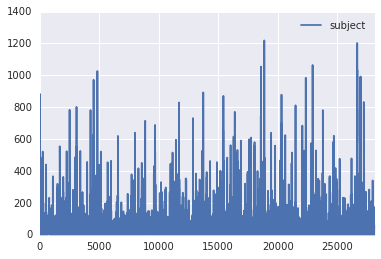

In [100]:
sns.tsplot(df.mi,condition='subject')

In [49]:
#This interprets the integers as seconds since the Epoch.
type(df.index)

pandas.tseries.index.DatetimeIndex

In [54]:
df=df.resample('1H').groupby('subject').sum()

TypeError: 'TimeGrouper' object is not callable

In [53]:
df.tail()

,mi,steps,Standing time,lying time,standing change,stand state,lying bouts
start,,,,,,,
2016-10-06 19:00:00,2291.0,606.0,12465.0,9429.0,9.0,12.0,3.0
2016-10-06 20:00:00,1167.0,283.0,11855.0,8831.0,11.0,18.0,8.0
2016-10-06 21:00:00,379.0,70.0,3664.0,15856.0,11.0,5.0,6.0
2016-10-06 22:00:00,505.0,113.0,7137.0,17564.0,11.0,9.0,4.0
2016-10-06 23:00:00,285.0,48.0,3483.0,9616.0,13.0,6.0,8.0


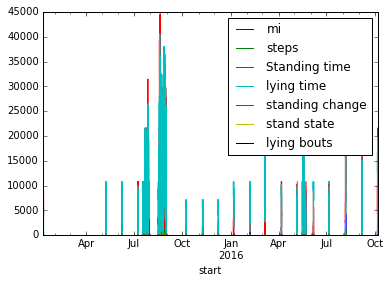

In [57]:
df.plot()